# PE06 Hrishikesh Vaze
### DWDM Lab 4 Part B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import  tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# load iris data
df = pd.read_csv('./nursery.data')
df.columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'target']
df.head(2)

,parents,has_nurs,form,children,housing,finance,social,health,target
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom


In [3]:
# preprocessing
df.isnull().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
target      0
dtype: int64

In [4]:
# now encode all categorical variables
le = LabelEncoder()
df['parents'] = le.fit_transform(df['parents'])
df['has_nurs'] = le.fit_transform(df['has_nurs'])
df['form'] = le.fit_transform(df['form'])
df['children'] = le.fit_transform(df['children'])
df['housing'] = le.fit_transform(df['housing'])
df['finance'] = le.fit_transform(df['finance'])
df['social'] = le.fit_transform(df['social'])
df['health'] = le.fit_transform(df['health'])
df['target'] = le.fit_transform(df['target'])
df.head(3)

,parents,has_nurs,form,children,housing,finance,social,health,target
0,2,3,0,0,0,0,0,1,1
1,2,3,0,0,0,0,0,0,0
2,2,3,0,0,0,0,2,2,2


In [5]:
classifier = tree.DecisionTreeClassifier(random_state=0)
#splitting
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = classifier.fit(X_train, y_train)

In [6]:
print(tree.export_text(classifier))

|--- feature_7 <= 0.50
|   |--- class: 0
|--- feature_7 >  0.50
|   |--- feature_1 <= 3.50
|   |   |--- feature_1 <= 1.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- feature_7 <= 1.50
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |--- feature_0 <= 0.50
|

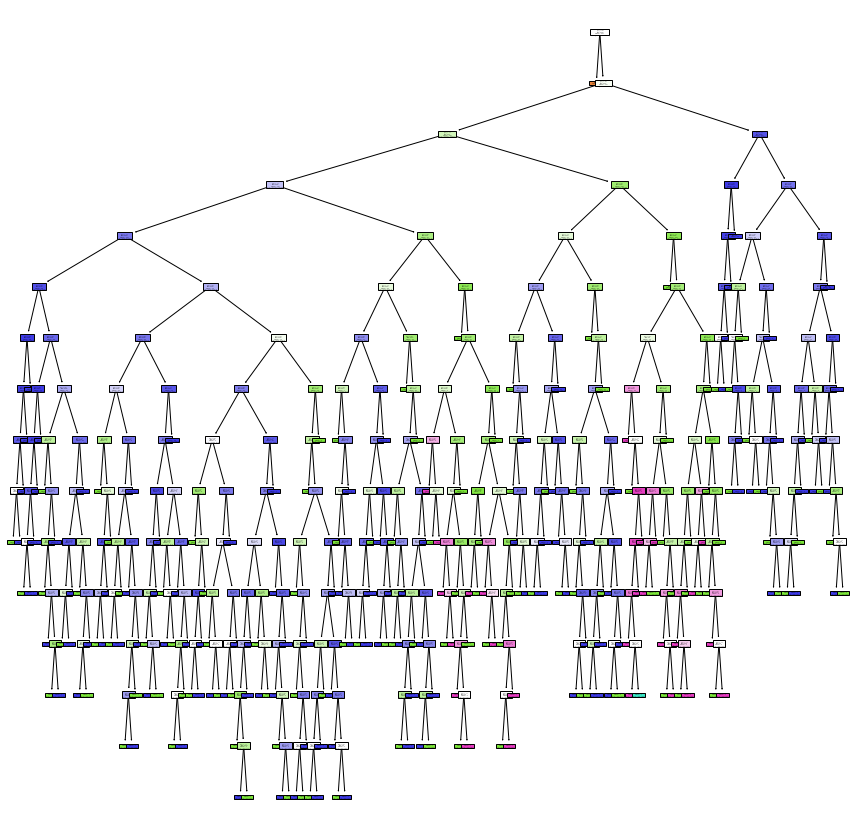

In [7]:
plt.figure(figsize=(15,15))
tree.plot_tree(classifier, filled=True)
plt.show()

In [8]:
# print accuracy
print(f'Training Accuracy: {classifier.score(X_train, y_train)}')
print(f'Testing Accuracy: {classifier.score(X_test, y_test)}')

Training Accuracy: 1.0
Testing Accuracy: 0.9965277777777778


In [9]:
# confusion matrix
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[878   0   0   0]
 [  0 835   1   3]
 [  0   2 817   0]
 [  0   3   0  53]]
